## Exercise 12
# Deep Neural Networks for Handwritten Digit Classification

In this set of exercises, we'll delve deeper into Deep Neural Networks (DNNs), expanding on the concepts we explored in Exercise 11. The key difference here is the introduction of multiple hidden layers with numerous neurons in each layer.
Our focus shifts from function regression to a classification problem. Specifically, we'll train DNNs to recognize ten handwritten digits (0-9).
We'll be using the MNIST dataset, readily available through Keras. This dataset consists of:

- 70,000 handwritten digit images
- Each image is represented on a 28x28 pixel grid
- Pixels are in grayscale, with 256 possible gradations

Throughout these exercises, we'll explore how to build, train, and evaluate DNNs for this complex image classification task, leveraging the power of deep learning to recognize handwritten digits with high accuracy.

## 12.1 Testing optimizers
The first exercise focuses on evaluating the performance of trained models using different optimizers.

## Dataset and NN structure set up

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import json

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

def printscore(score):
    print('*******************************************************')
    print('Model performance:')
    print('– Test loss:', score[0])
    print('– Test accuracy:', score[1])
    print('*******************************************************')

In [8]:
###### DATA ##########################################
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

###### DNN ##########################################
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

## Training on SGD

In [9]:
'''def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))'''

"def compile_model():\n    # create the model\n    model=create_DNN()\n    # compile the model\n    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])\n    return model\n\n# training parameters\nbatch_size = 32\nepochs = 5\n\n# create the deep neural net\nmodel_DNN = compile_model()\n\n# train DNN and store training info in history\nhistory = model_DNN.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))"

## Performance of SGD

In [10]:
'''plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots(1,2)

hist=['accuracy', 'loss'] 
val_hist=['val_accuracy', 'val_loss']

# summarize history for accuracy and loss
for i in range(2):
    ax[i].plot(history.history[hist[i]])
    ax[i].plot(history.history[val_hist[i]])
    ax[i].set_ylabel('model '+hist[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].grid()
    ax[i].set_title(hist[i], size='x-large')
plt.show()

score = model_DNN.evaluate(X_test, Y_test, verbose=0)
printscore(score)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)'''

'plt.rcParams[\'figure.figsize\'] = [17, 6]\nfig, ax = plt.subplots(1,2)\n\nhist=[\'accuracy\', \'loss\'] \nval_hist=[\'val_accuracy\', \'val_loss\']\n\n# summarize history for accuracy and loss\nfor i in range(2):\n    ax[i].plot(history.history[hist[i]])\n    ax[i].plot(history.history[val_hist[i]])\n    ax[i].set_ylabel(\'model \'+hist[i])\n    ax[i].set_xlabel(\'epoch\')\n    ax[i].legend([\'train\', \'test\'], loc=\'best\')\n    ax[i].grid()\n    ax[i].set_title(hist[i], size=\'x-large\')\nplt.show()\n\nscore = model_DNN.evaluate(X_test, Y_test, verbose=0)\nprintscore(score)\n\npredictions = model_DNN.predict(X_test)\n\nX_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)\n\nplt.figure(figsize=(15, 15)) \nfor i in range(10):    \n    ax = plt.subplot(2, 10, i + 1)    \n    plt.imshow(X_test[i, :, :, 0], cmap=\'gray\')    \n    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    \n    plt.axis(\'off\') \nplt.show()\nX_test =

## Let's compare SGD with other optimizers: Adam, RMSprop, Adagrad, Adadelta

SGD


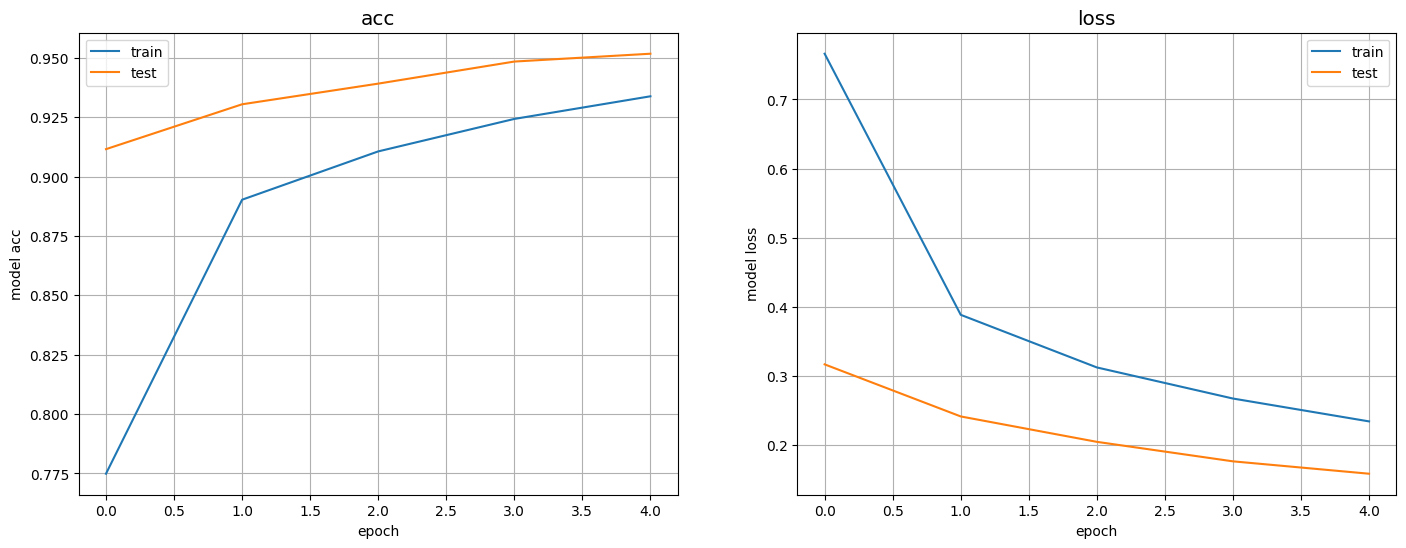

*******************************************************
Model performance:
– Test loss: 0.1581811010837555
– Test accuracy: 0.9517999887466431
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


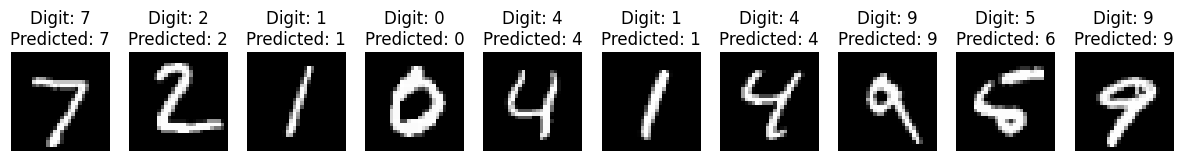


Adam


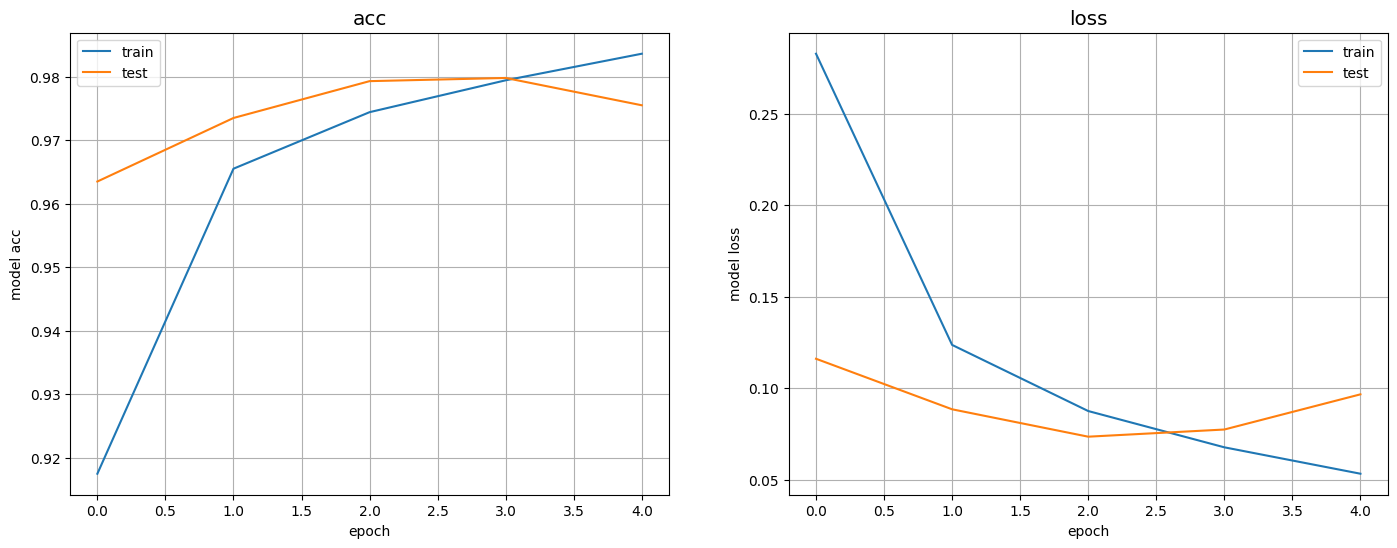

*******************************************************
Model performance:
– Test loss: 0.09663251787424088
– Test accuracy: 0.9754999876022339
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


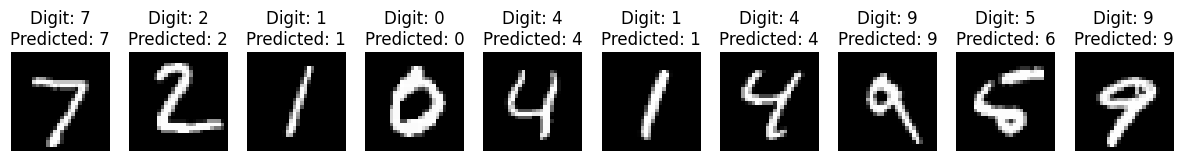


RMSprop


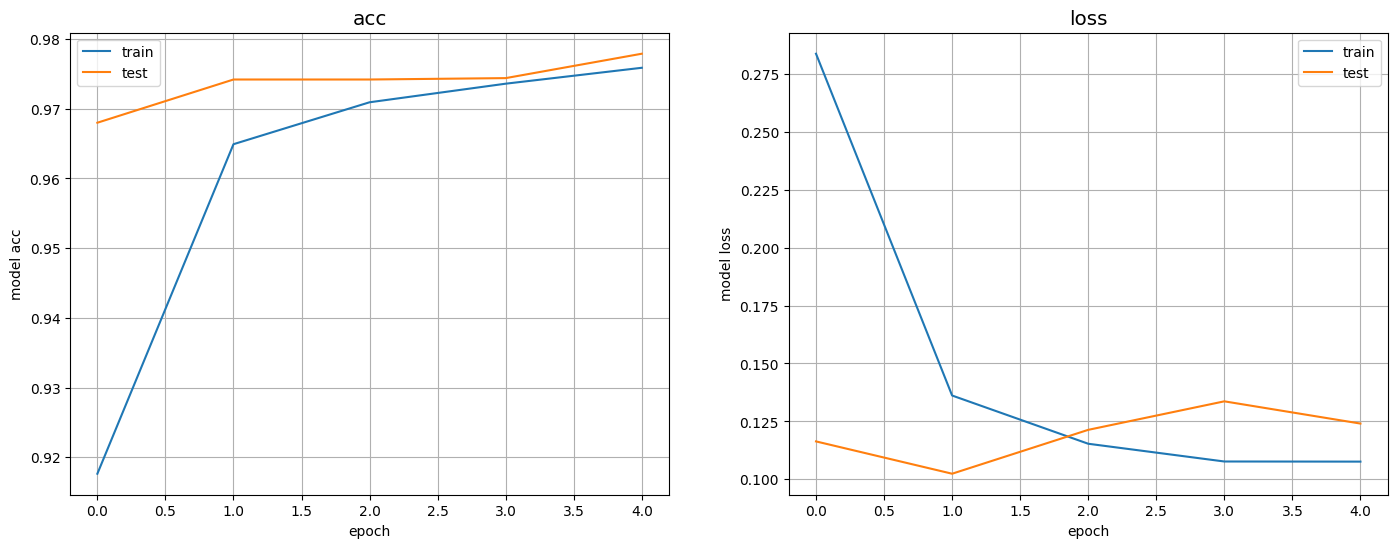

*******************************************************
Model performance:
– Test loss: 0.1240718886256218
– Test accuracy: 0.9779000282287598
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


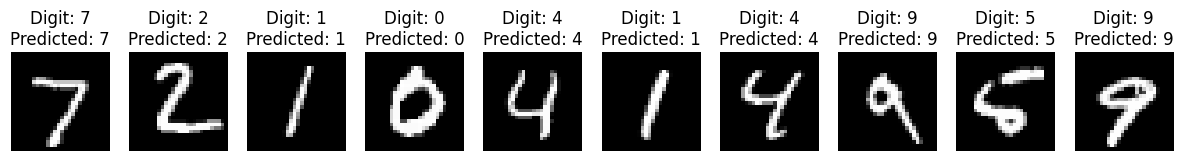


Adagrad


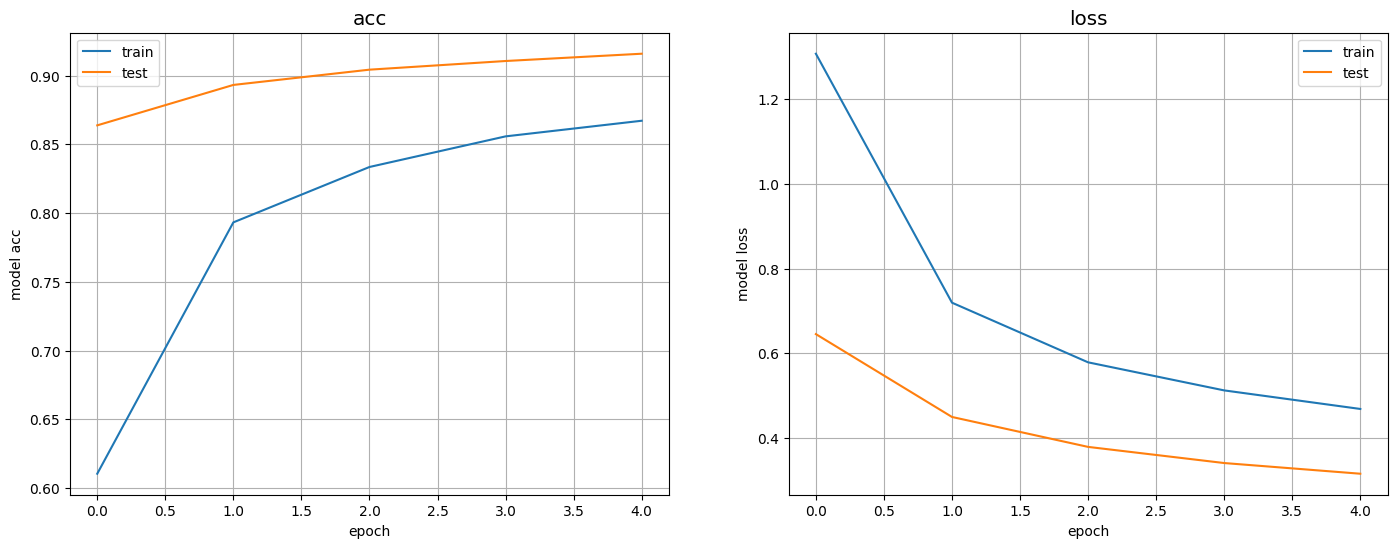

*******************************************************
Model performance:
– Test loss: 0.31524577736854553
– Test accuracy: 0.9158999919891357
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


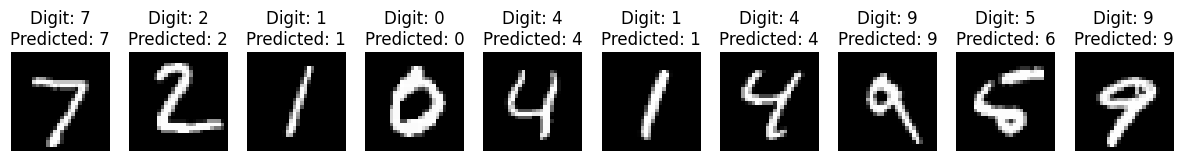


Adadelta


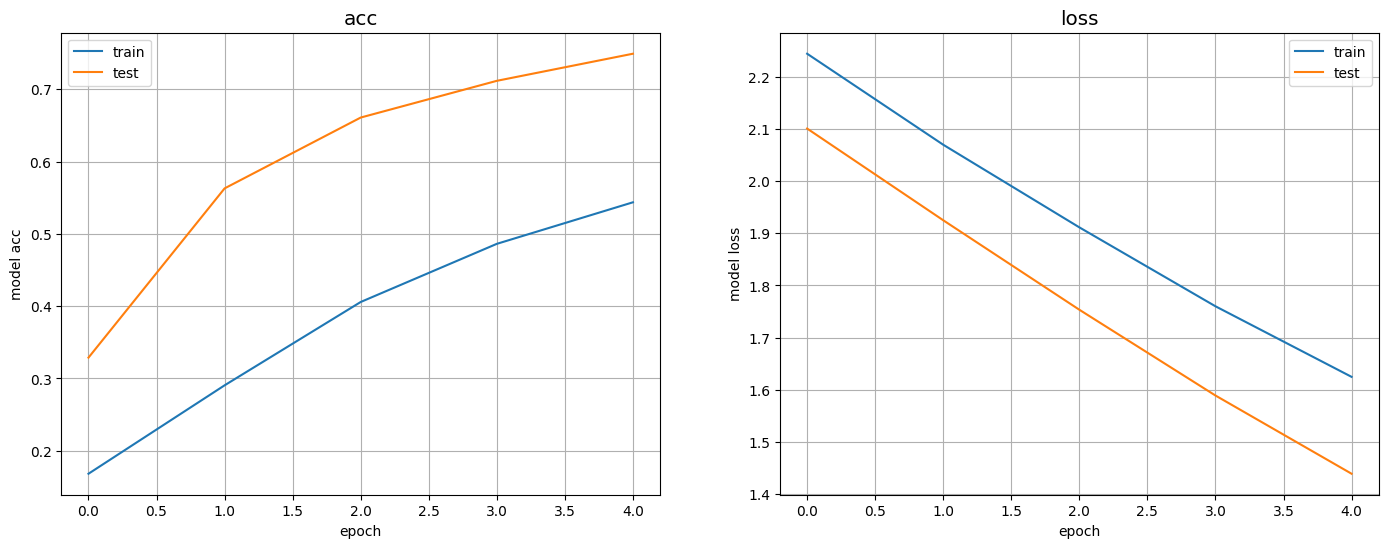

*******************************************************
Model performance:
– Test loss: 1.438737154006958
– Test accuracy: 0.7491999864578247
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


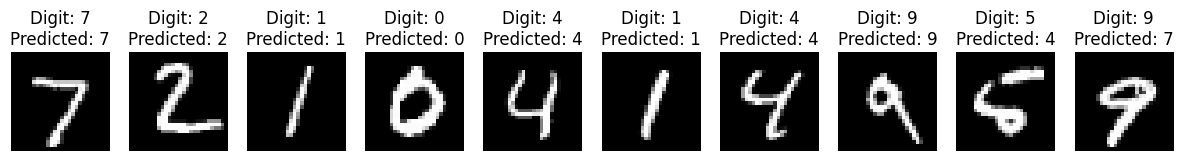

In [16]:
models=['SGD', 'Adam', 'RMSprop','Adagrad','Adadelta']
# training parameters
batch_size = 32
epochs = 5
hist=['acc', 'loss'] 
val_hist=['val_acc', 'val_loss']
for m in range(5):
    print(models[m])
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=models[m],
                  metrics=['acc'])
    plt.rcParams['figure.figsize'] = [17, 6]
    fig, ax = plt.subplots(1,2)
    
    # train DNN and store training info in history
    history = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(X_test, Y_test))
    # summarize history for accuracy and loss
    for k in range(2):
        ax[k].plot(history.history[hist[k]])
        ax[k].plot(history.history[val_hist[k]])
        ax[k].set_ylabel('model '+hist[k])
        ax[k].set_xlabel('epoch')
        ax[k].legend(['train', 'test'], loc='best')
        ax[k].grid()
        ax[k].set_title(hist[k], size='x-large')
    plt.show()
    score = model.evaluate(X_test, Y_test, verbose=0)
    printscore(score)
    predictions = model.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(10):    
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    print("")

## Optimizer Performance Analysis

Our results reveal that SGD, Adam and RMSprop optimizers achieve an accuracy exceeding 95%. The other optimizers are worse and we note that the only optimizer able to recognize a bad written 5 is RMSprop. 

We notice, for SGD, RMSprop, Adagard and Adadelta, how the classification accuracy on the validation (test) data is higher than that during training. This is due to the Dropout layer, which "turns off" some neurons during the training phase (reducing the network's accuracy at that moment, but forcing the remaining neurons to learn better). During testing, all neurons are active, so the accuracy is higher than during training. The effect of the dropout layer is less noticeable in these cases: the accuracy in classifying the test data is slightly higher than that of the training data when using RMSprop, and even lower when using the Adam algorithm.

